In [1]:
# import necesary libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from sklearn.decomposition import PCA
from numpy import linalg

In [2]:
# read in data file in google colab specific call
from google.colab import files
uploaded = files.upload()

Saving ovarian_cancer.csv to ovarian_cancer.csv


In [3]:
# define dataframe from data file, set up arrays

df = pd.read_csv('ovarian_cancer.csv')

df['status'] = pd.Categorical(df.status)
print(df.head())

# make data only dataframe (excludes categorical and string types)
data = pd.read_csv('ovarian_cancer.csv')
del data['status']
del data['patients']

X = data.to_numpy()
Xt = np.transpose(X)

M = np.mean(X, axis = 0)
Mt = np.mean(Xt,axis = 0)

B = X - M
Bt = Xt - Mt

   status patients    gene_0    gene_1    gene_2    gene_3    gene_4  \
0  Cancer       P0  0.063915  0.033242  0.018484  0.008618  0.035629   
1  Cancer       P1  0.025409  0.051085  0.056305  0.021738  0.027410   
2  Cancer       P2  0.025536  0.036123  0.054195  0.009735  0.027521   
3  Cancer       P3  0.012817  0.029652  0.079290  0.050677  0.039737   
4  Cancer       P4  0.019846 -0.010577 -0.007504  0.019042  0.068786   

     gene_5    gene_6    gene_7  ...  gene_3990  gene_3991  gene_3992  \
0  0.037925  0.028865  0.061731  ...   0.035119   0.021515   0.017385   
1  0.014914  0.022455  0.023957  ...   0.050841   0.055033   0.080864   
2  0.052255  0.042812  0.069087  ...   0.029078   0.033783   0.029022   
3  0.057713  0.044492  0.034581  ...   0.054675   0.036083   0.038598   
4  0.061764  0.039036  0.020445  ...   0.063163   0.032044   0.026320   

   gene_3993  gene_3994  gene_3995  gene_3996  gene_3997  gene_3998  gene_3999  
0   0.018564   0.010027   0.012907   0.023405  

In [36]:
# define PCA implementation, A as a numpy array
# takes an array and outputs the first two principal components and singular values

def myPCA(A):
  #mean of data samples
  M = np.mean(A, axis = 0)
  #mean centered data
  B = A - M
  # SVD of mean centered data
  Um, sm, Vtm = linalg.svd(B)
  # diagonal matrix of s
  Sigma = np.diag(sm)
  # get principlal components as columns of T
  T = np.dot(Um,Sigma)
  # define first two principle component vectors
  pc1 = T[:,0]
  pc2 = T[:,1]
  return pc1,pc2,sm

(216, 4000)
(4000,)


Text(0.5, 0, 'singular value index')

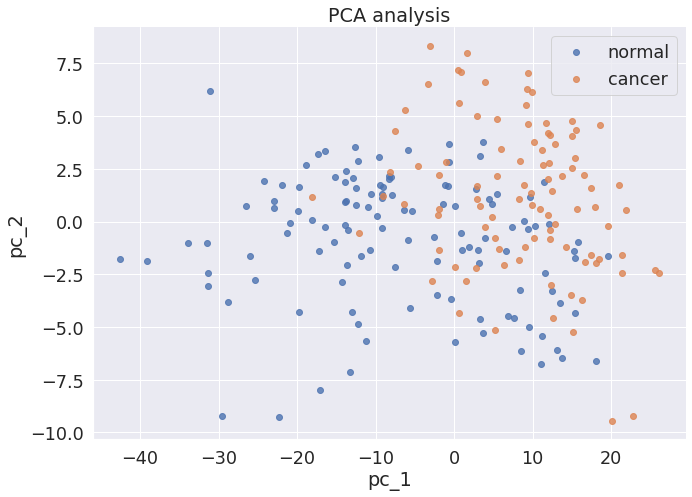

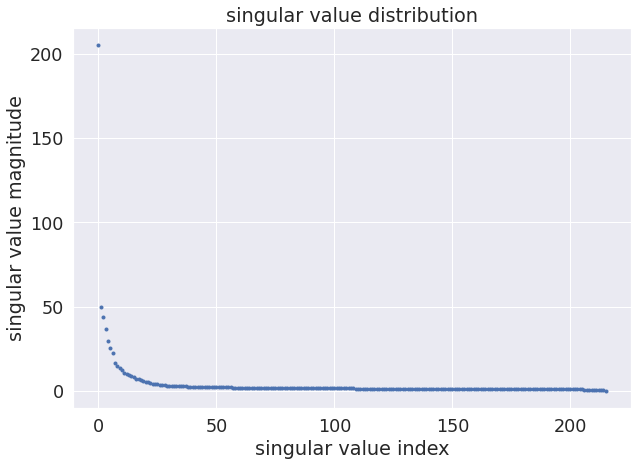

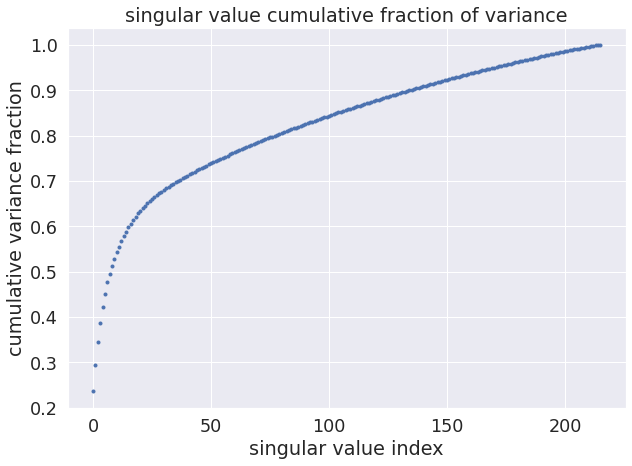

In [55]:
# use myPCA to compute first two principle components and plot

print(np.shape(X))
print(np.shape(M))
#compute principle components
pc_1, pc_2, sm= myPCA(X)

#add principle components to dataframe
df['pc_1'] = pc_1
df['pc_2'] = pc_2


#plot projection of principle components
sns.set(font_scale=1.6) 
sns.lmplot(x="pc_1", y="pc_2", data=df, fit_reg=False, hue = 'status',legend=False,height=7, aspect=10/7,)
plt.title('PCA analysis')
plt.legend(labels=['normal','cancer'])

# plot of singular values
plt.figure(figsize = (10,7))
plt.plot(range(0,216),sm,'.')
plt.title('singular value distribution')
plt.ylabel('singular value magnitude')
plt.xlabel('singular value index')

# plot of cumulative variance captured by singular values
cumulative_s = np.array([])
plt.figure(figsize = (10,7))
plt.plot(range(0,216),np.cumsum(sm) / np.sum(sm),'.')
plt.title('singular value cumulative fraction of variance')
plt.ylabel('cumulative variance fraction')
plt.xlabel('singular value index')



In [31]:
print(np.shape(M))
print(np.shape(X))
print(np.shape(Xt))


(4000,)
(216, 4000)
(4000, 216)


In the above plot we note that most of the singular values are quite similar, with the exception of a few extreme outliers.

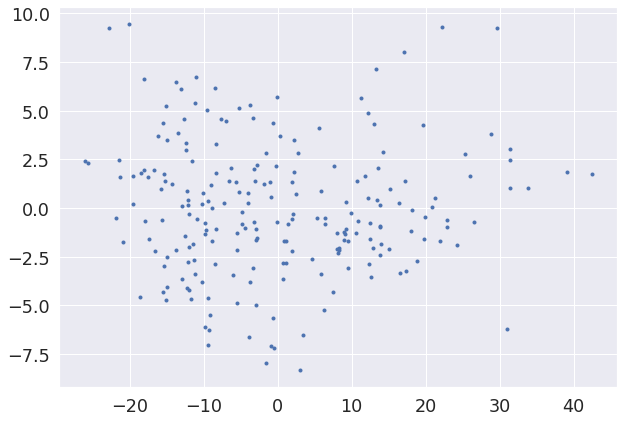

In [46]:
pca = PCA(n_components=2)
pca.fit(B)
trueT = pca.transform(B)

plt.figure(figsize = (10,7))
truePC1 = trueT[:,0]
truePC2 = trueT[:,1]
plt.plot(truePC1,truePC2,'.')